# Using data to understand AirBnB and make data-driven decisions

Airbnb is a unique platform that offers you someone’s home as a place to stay instead of a hotel. This idea not only benefits the consumer by giving him more options for his/her stay, but it also benefits service provider as it gives him/her easy money. This startup has been values for $31 billion in 2017. AirBnB has altered how renters and homeowners talk to each other and made it easier, smoother, and a more pleasant experience. It’s easy for us to think as a costumer of AirBnB as most of us has been one, however, this blog will look at data from the prospective of the service provider/homeowner. Assuming a person (A) is offering his house for rent on AirBnb for the first time, he/she might have some questions like:

1. What the is the time of the year where listings are always booked?
2. What the is the time of the year where listings are always booked? 
3. How are reviews affected? 


This blog will address answering those questions in detail.

In [1]:
# Let's import what we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## A) Understanding the data

Before we analyze the dataset, let's try to understand it and view its structure. The Seattle AirBnB Dataset consist of 3 subsets: Listings, Calender Availability, and Reviews.



### Data set #1 : Calender


In [2]:
calendar = pd.read_csv('./seattle/calendar.csv')
calendar.head(-1)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [3]:

print("Calender(Rows, Columns) =", calendar.shape)

print(calendar.isnull().sum())
print(calendar.describe(include='all'))

Calender(Rows, Columns) = (1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-12-24         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


### Calender Dataset:

Looking at the properties of the data above, we can conclude the following:
1. Data looks clean and neat!
2. There are 4 columns in the dataset (	listing_id,	date,	available,	price)
3. All columns are not missing any data except for price
4. Date covers the entire year

### Data set #2 : Listing



In [4]:
listings = pd.read_csv('./seattle/listings.csv')

listings.head(-1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [5]:

print("Listing(Rows, Columns) =", listings.shape)

print(listings.isnull().sum())
print(listings.describe(include='all'))

Listing(Rows, Columns) = (3818, 92)
id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate   

### Listings Dataset:

Looking at the properties of the data above, we can conclude the following:
1. This dataset is dense and has so many information including a lot of Categorical Features like "Host Location"
2. There are 92 columns in the dataset but some will not be included in the analysis like "picture url ".
3. There are some missing data but the numbers do not appear to be significant.
4. Some columns like : "require_guest_phone_verification" is already categorized with 2 unique values which would make preparing the data easier

### Data set #3 : Reviews


In [6]:
# Data set #3 : Reviews
reviews = pd.read_csv('./seattle/reviews.csv')

reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
print("Reviews(Rows, Columns) =", reviews.shape)

print(reviews.isnull().sum())
print(reviews.describe(include='all'))

Reviews(Rows, Columns) = (84849, 6)
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN  2.7

### Reviews Dataset:

Looking at the properties of the data above, we can conclude the following:
1. This dataset is very user friendly
2. There are 6 columns in the dataset with only 18 missing data (less than 0.02% )

In [8]:
# all columns together


print(listings.columns.values)
print(calendar.columns.values)
print(reviews.columns.values)


['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_verifications' 'host_has_profile_pic'
 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'security_deposit'
 'cleaning_fee' 'guests_included' 'extra_people' 'minimum_nights'
 'm

## B) What the is the time of the year where listings are always booked? 

This is a very important question for all property owners!

In [55]:
fullyBooked = calendar[(calendar.available == 'f')]

fullyBooked['month'] = pd.DatetimeIndex(fullyBooked['date']).month

C:\Users\Fatemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
fullyBooked.describe()

,listing_id,price,month
count,4.590280e+05,0.0,459028.000000
mean,6.048085e+06,NaN,6.259309
std,2.872915e+06,NaN,3.422890
min,3.335000e+03,NaN,1.000000
25%,3.961077e+06,NaN,3.000000
50%,6.727846e+06,NaN,6.000000
75%,8.342429e+06,NaN,9.000000
max,1.034016e+07,NaN,12.000000


In [66]:
fullyBooked_list = fullyBooked[['month','listing_id']]

number = []
for i in range(1, 13): 
    number.append(len(fullyBooked_list[(fullyBooked['month'] == i)]['listing_id'].unique()))

number = pd.DataFrame(number)
number.index = number.index+1 #remove the 0 for numbers to make sense in the month
number.columns = ['Fully booked listings']
number


,Fully booked listings
1,3007
2,1933
3,1573
4,1652
5,1525
6,1520
7,1665
8,1523
9,1365
10,1216


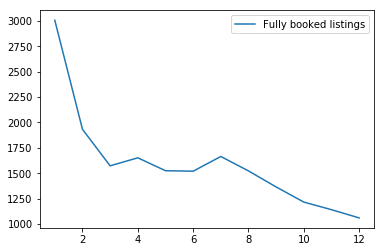

In [68]:
number.plot()

From the above analysis, it could be inferred that # of fully booked listings is high during January and goes down as we move to December.

## C) How does price change and what factors affect it? 

Before we jump to conclusions, we must prepare the data for the analysis. This is a very critical step!


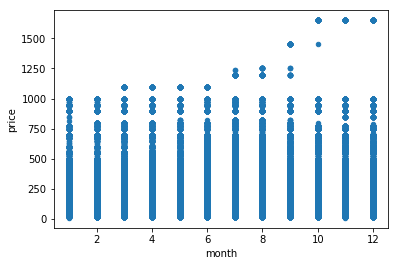

In [11]:

# Looking at the price visually through graphs over time 
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['price'] = calendar['price'].replace('$', '')

calendar.plot(kind="scatter", x = 'month', y = 'price');

It looks like prices do not vary that much througout the year, however, starting from July, home owners do are charging a bit more in some of the houses. This could be due to the fact that this is a high season.

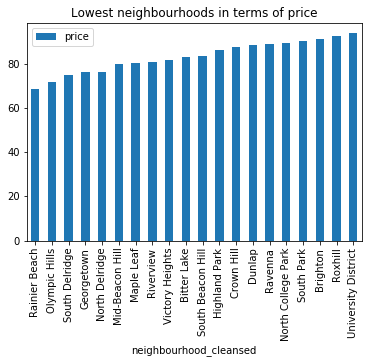

In [15]:
#let's see if location has an asociation with price

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
z = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price')

z.iloc[:20].plot(kind = 'bar', title= 'Lowest neighbourhoods in terms of price');



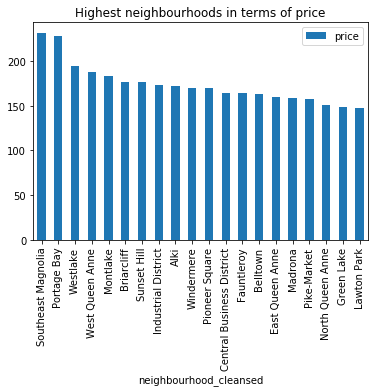

In [16]:
listings['price'] = listings['price'].replace('$', '')
z = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)

z.iloc[:20].plot(kind = 'bar', title= 'Highest neighbourhoods in terms of price');


It looks like "Southeast Magnolia" & "Portage Bay" are the highest in terms of price and "Rainier Beach" & "Olympic Hills" are the lowest.

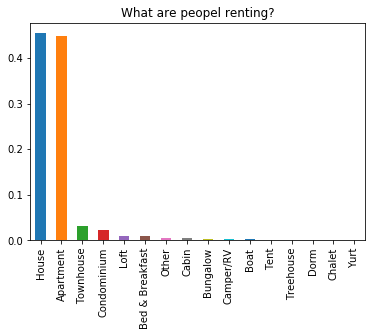

In [17]:
x = listings['property_type'].value_counts()
(x/listings.shape[0]).plot(kind="bar");
plt.title("What are peopel renting?");


It looks like House and apartments are the most popular type of rentals, hence, we will look on how price varies on those 2 variables.

In [18]:
#For the sake of thinking as a home owner, we will look at the highest and lowest cities only
High = ('Southeast Magnolia','Portage Bay','Westlake')
Low = ('South Delridge' ,'Olympic Hills', 'Rainier Beach','Georgetown', 'North Delridge')

properties = ('Apartment','House')
listings_high = listings.loc[listings['neighbourhood_cleansed'].isin(High)]
listings_low = listings.loc[listings['neighbourhood_cleansed'].isin(Low)]
listings_properties_high = listings_high.loc[listings['property_type'].isin(properties)]
listings_properties_low = listings_low.loc[listings['property_type'].isin(properties)]


print('High Neighbouhoods price as a function of property type')

listings_properties_high_2 = listings_properties_high.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
listings_properties_high_2




High Neighbouhoods price as a function of property type


,neighbourhood_cleansed,property_type,price
0,Portage Bay,Apartment,113.833333
1,Portage Bay,House,340.285714
2,Southeast Magnolia,Apartment,219.600000
3,Southeast Magnolia,House,234.100000
4,Westlake,Apartment,142.400000
5,Westlake,House,168.000000


Houses are generally higher in price in those neighbourhoods.

In [19]:
print('Low Neighbouhoods price as a function of property type')

listings_properties_low_2 = listings_properties_low.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
listings_properties_low_2

Low Neighbouhoods price as a function of property type


,neighbourhood_cleansed,property_type,price
0,Georgetown,House,73.000000
1,North Delridge,Apartment,83.666667
2,North Delridge,House,73.681818
3,Olympic Hills,Apartment,95.000000
4,Olympic Hills,House,70.133333
5,Rainier Beach,House,65.062500
6,South Delridge,Apartment,48.000000
7,South Delridge,House,81.125000


Apartments are generally higher in price in those neighbourhoods.

.

From the above data, we can generalize the following:

If the homeowner is in the high price area, he is better off renting a house, however, generally speaking, if the homeowner is in the low prices ares, he is better off renting an apartment.

## D) How are reviews affected? 

Let's explore the most entertaining part of AirBnB, the reviews.
While looking at the reviews indivisually (one by one) seems like an easy job, doing it through a code is a lot easier!

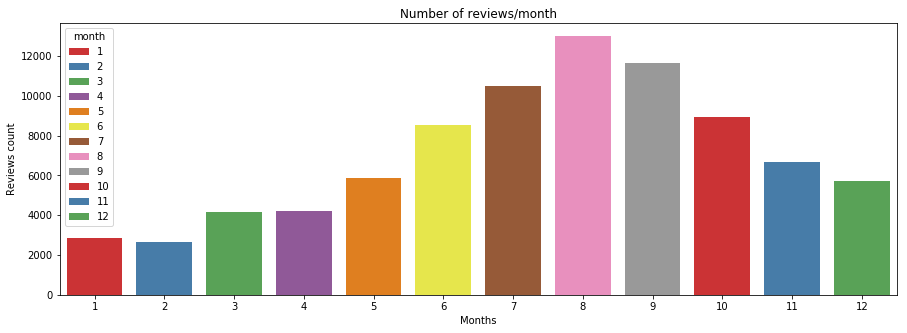

In [97]:
reviews['month'] = pd.DatetimeIndex(reviews['date']).month

reviews_count = reviews.groupby(['month'])['reviewer_id'].count()

graph = plt.figure(figsize=(15, 5))
sns.barplot(reviews_count.index, reviews_count.values,
            hue=reviews_count.index.get_level_values(0), dodge=False, palette='Set1')


plt.xlabel('Months')
plt.ylabel('Reviews count')
plt.title('Number of reviews/month')
plt.show()


It looks like the highest number of reviews was during the month of August, this could be associated with the fact this is a high season and a lot of people do rent AirBnB during this month.

In [151]:
listings_2 = listings.copy()

listings_2['price'] = listings_2['price'].replace('[\$,]', '', regex=True).astype(float)

listings_2 = listings_2[listings_2.applymap(np.isreal)]

listings_2.dropna(how = "all", axis = 1, inplace = True)

listings_2.replace(["NaN"], np.nan, inplace = True)
listings_2 = listings_2.dropna()
listings_2 = listings_2.drop(['id','scrape_id','host_id','latitude','longitude','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count'], axis=1) 

listings_2.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
96,2.0,2.0,2,1.0,1.0,1.0,400.0,89.0,2,2,14,10,40,70,341,244,97.0,3.64
103,2.0,2.0,3,1.0,1.0,2.0,485.0,97.0,2,2,1125,21,47,77,340,44,98.0,1.55
163,1.0,1.0,3,1.0,1.0,2.0,800.0,120.0,2,2,120,0,22,52,320,131,97.0,2.59
182,1.0,1.0,4,1.0,0.0,1.0,450.0,95.0,2,2,30,3,21,49,313,115,99.0,4.79
196,2.0,2.0,6,2.0,3.0,3.0,1.0,180.0,1,3,21,0,0,5,5,10,96.0,0.29


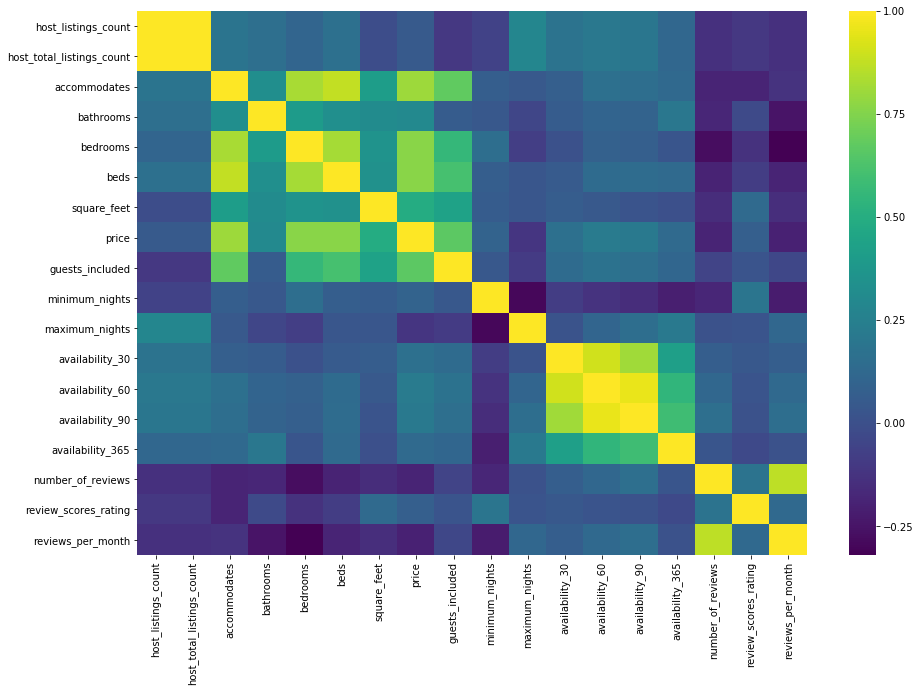

In [153]:
f,ax = plt.subplots(figsize=(15,10))
listings_normalize=(listings_2-listings_2.mean())/listings_2.std()

sns.heatmap(listings_normalize.corr(), fmt="b", cmap='viridis') 
plt.show()

from the above heatmap, it could be inferred that there is no clear association between the review scores and the other variables, however, reviews per month has some association with the review score. This could be asociated with the fact that people tend to be affected in their scores by previous scores as well! Interesting ha?